# Creating a random forest and visualizing their implicit decision trees in pipeline

In [1]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('df.csv', sep = ',')
df.head()

,Date,Revenue,GDP,UnemploymentRate
0,2013-01-01,189374.350769,2.297128e+12,1.349174
1,2013-01-02,819889.508928,2.297498e+12,1.338910
2,2013-01-03,657055.572183,2.297862e+12,1.330354
3,2013-01-04,611457.867576,2.298220e+12,1.323307
4,2013-01-05,594650.430267,2.298573e+12,1.317583


In [3]:
X = df[['GDP','UnemploymentRate']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=0)

# Creating the pipeline with the random forest regressor model

In [4]:
regr = RandomForestRegressor(random_state = 100,bootstrap = True, max_depth=2,max_features=2,min_samples_leaf=3,min_samples_split=5,n_estimators=3)
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', regr)
        ])
pipe.fit(X_train,y_train)
ypipe=pipe.predict(X_test)

# Visualizing the first tree in the forest

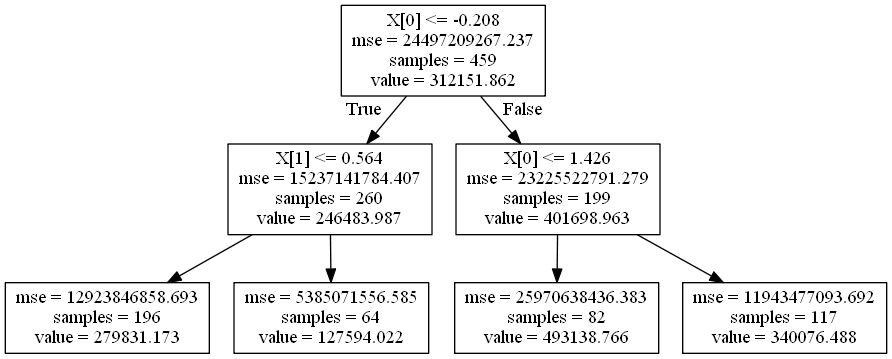

In [5]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(pipe.named_steps['regressor'].estimators_[0], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# Visualizing the second tree in the forest

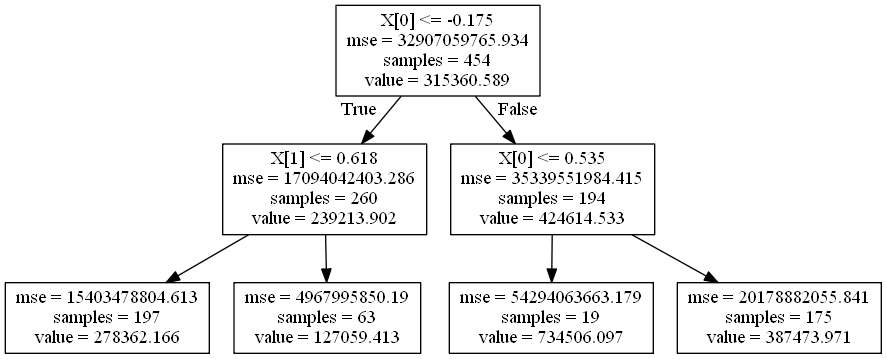

In [6]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(pipe.named_steps['regressor'].estimators_[1],  out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())